<function matplotlib.pyplot.show>

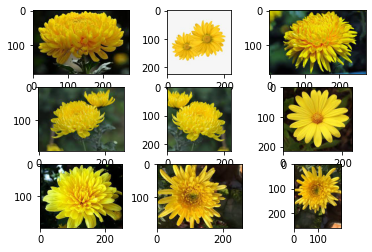

In [30]:
from matplotlib import image
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder ='/content/drive/MyDrive/HOA/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'cuc.' + str(i) +'.jpg'
  image = imread(filename)
  plt.imshow(image) 
plt.show

In [31]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/HOA/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thuocduoc'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('huongduong'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('vantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos = asarray(photos)
labels = asarray(labels)

print(photos.shape,labels.shape)

save('10TraiCay_photos.npy', photos)
save('10TraiCay_labels.npy', labels)

(103, 150, 150, 3) (103,)


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 28ms/step - loss: 2285.6497 - accuracy: 0.2330
Epoch 2/50
4/4 [==============================] - 0s 27ms/step - loss: 1547.1082 - accuracy: 0.3010
Epoch 3/50
4/4 [==============================] - 0s 24ms/step - loss: 188.7544 - accuracy: 0.4078
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 30.6428 - accuracy: 0.4078
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 7.4495 - accuracy: 0.6214
Epoch 6/50
4/4 [==============================] - 0s 22ms/step - loss: 1.8952 - accuracy: 0.7476
Epoch 7/50
4/4 [==============================] - 0s 22ms/step - loss: 0.9731 - accuracy: 0.7961
Epoch 8/50
4/4 [==============================] - 0s 22ms/step - loss: 0.5663 - accuracy: 0.8155
Epoch 9/50
4/4 [==============================] - 0s 23ms/step - loss: 0.7241 - accuracy: 0.8447
Epoch 10/50
4/4 [==============================] - 0s 24ms/step - loss: 0.9518 - accuracy: 0.7961
Epoch 11/50
4/4 [===

In [33]:
model.evaluate(photos,labels)

4/4 [==============================] - 0s 12ms/step - loss: 2.2929e-04 - accuracy: 1.0000


[0.0002292881690664217, 1.0]

In [34]:
model.save('HOA_Final.h5')


In [35]:
from keras.models import load_model
model5 = load_model('HOA_Final.h5')

In [36]:
classes = ["cuc","thuocduoc","huongduong","vantho"]

[[0.13281827 0.10626904 0.12554406 0.12077282 0.11142592 0.09015897
  0.0834362  0.09367303 0.06473871 0.07116304]]


'cuc'

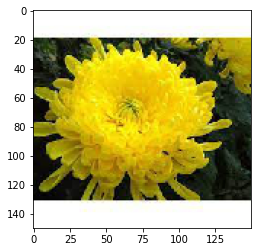

In [39]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array  
from keras.preprocessing.image import array_to_img
import numpy as np

img = load_img('images_t.jpg',target_size = (150,150))
plt.imshow(img)

imgre = img_to_array(img)
imgre = imgre.reshape(1,150,150,3)
imgre = imgre.astype('float32')
imgre /= 255
y_pred = model.predict(imgre)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

In [40]:
score = model.evaluate(photos, labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0002292881690664217
Test accuracy: 1.0
